In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [2]:
train = pd.read_csv('boston_train.csv')
test = pd.read_csv('boston_test.csv')
full_data = [train, test]

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
pd.set_option('display.max_rows', None)
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
train.drop('Id', axis = 1, inplace = True)

In [8]:
for df in full_data:
    for column in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                   'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']:
        df[column] = df[column].fillna('Na')
    
for df in full_data:
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-1)
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['Electrical'] = df['Electrical'].fillna('SBrkr')
    df['LotFrontage'] = df['LotFrontage'].fillna(68)
    df['MSZoning'] = df['MSZoning'].fillna('RL')
    df['Utilities'] = df['Utilities'].fillna('AllPub')
    df['Exterior1st'] = df['Exterior1st'].fillna('Other')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
    df['KitchenQual'] = df['KitchenQual'].fillna('TA')
    df['Functional'] = df['Functional'].fillna('Typ')
    df['GarageArea'] = df['GarageArea'].fillna(0)
    df['SaleType'] = df['SaleType'].fillna('Oth')
    df['GarageCars'] = df['GarageCars'].fillna(0)
    
full_data = [train, test]

In [9]:
train.isnull().sum().sum()

0

In [10]:
test.isnull().sum().sum()

0

In [11]:
for column in train.columns:
    if train[column].dtype == 'object':
        print(train[column].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Na      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Nei

In [12]:
corr_columns = [column for column in train.columns if train[column].dtype != 'object' and
                abs(np.corrcoef(train[column], train['SalePrice'])[0][1]) >= 0.5]

<AxesSubplot:>

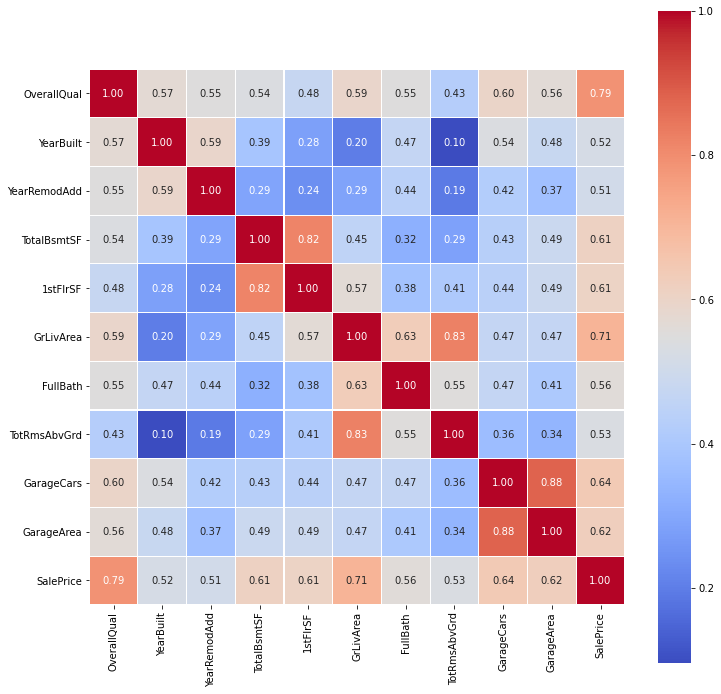

In [13]:
top_corr = train[corr_columns].corr()
plt.figure(figsize = (12, 12))
sns.heatmap(top_corr, annot=True, square=True, linewidths=.1, fmt = '.2f', cmap = 'coolwarm')

<AxesSubplot:xlabel='OverallQual', ylabel='TotalBsmtSF'>

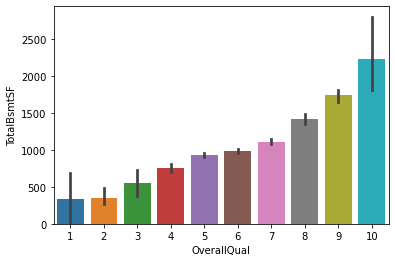

In [14]:
# 지하 면적의 대한 자재와 마감재
sns.barplot(data = train, x = 'OverallQual', y = 'TotalBsmtSF')

<AxesSubplot:xlabel='OverallQual', ylabel='TotalBsmtSF'>

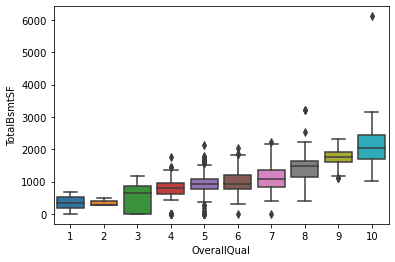

In [15]:
# 지하 면적의 대한 자재와 마감재
sns.boxplot(data = train, x = 'OverallQual', y = 'TotalBsmtSF')

<AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>

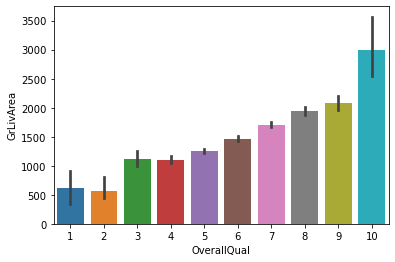

In [16]:
# 마감상태의 대비 지상면적
sns.barplot(data = train, x = 'OverallQual', y = 'GrLivArea')

<AxesSubplot:xlabel='YearBuilt', ylabel='OverallQual'>

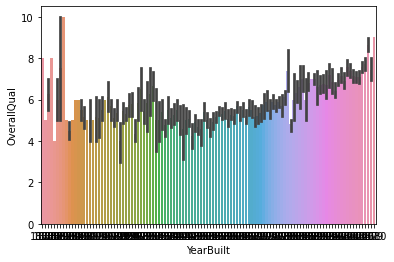

In [17]:
# 연식의 대한 자재와 마감재
sns.barplot(data = train, x = 'YearBuilt', y = 'OverallQual')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='OverallQual'>

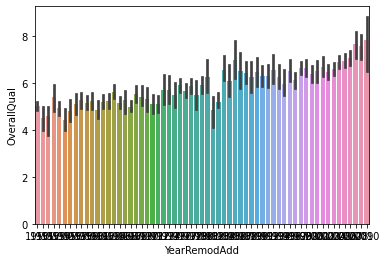

In [18]:
#리모델링 연식에 대한 자재와 마감재
sns.barplot(data = train, x = 'YearRemodAdd', y = 'OverallQual')

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

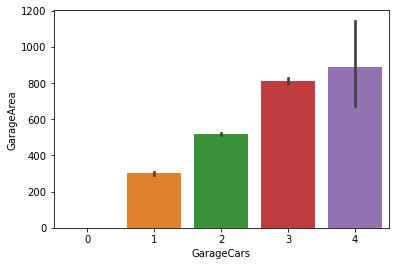

In [19]:
# 차의 갯수에 따른 지상 평수
sns.barplot(data = train, x = 'GarageCars', y = 'GarageArea')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>

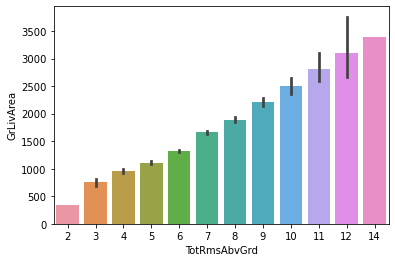

In [20]:
# 방의 갯수에 따른 지상 평수
sns.barplot(data = train, x = 'TotRmsAbvGrd', y = 'GrLivArea')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

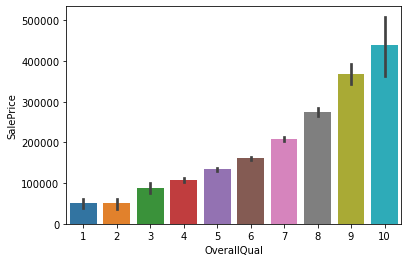

In [21]:
#집의 퀄리티 대비 가격
sns.barplot(data = train, x = 'OverallQual', y = 'SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

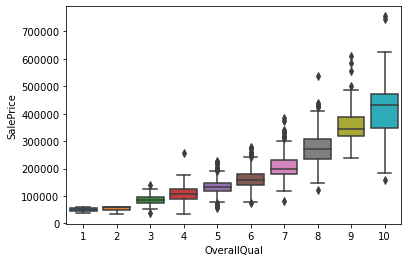

In [22]:
#집의 퀄리티 대비 가격
sns.boxplot(data = train, x = 'OverallQual', y = 'SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

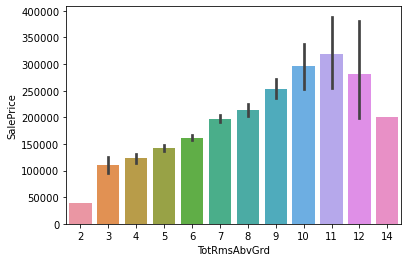

In [23]:
#방 갯수 (욕실 제외)
sns.barplot(data = train, x = 'TotRmsAbvGrd', y = 'SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

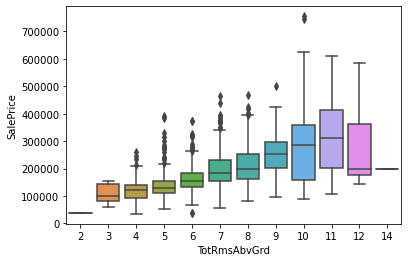

In [24]:
#방 갯수 (욕실 제외)
sns.boxplot(data = train, x = 'TotRmsAbvGrd', y = 'SalePrice')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

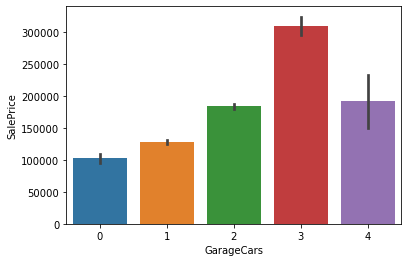

In [25]:
# 자동차 수용공간 대비 가격
sns.barplot(data = train, x = 'GarageCars', y = 'SalePrice')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

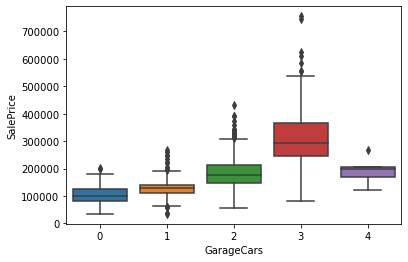

In [26]:
# 자동차 수용공간 대비 가격
sns.boxplot(data = train, x = 'GarageCars', y = 'SalePrice')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

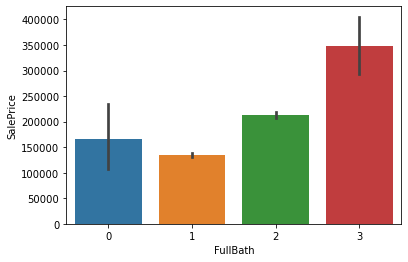

In [27]:
# 욕실 갯수
sns.barplot(data = train, x = 'FullBath', y = 'SalePrice')

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

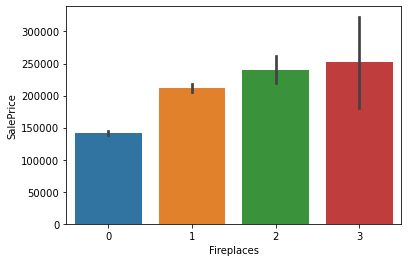

In [28]:
# 벽난로 갯수
sns.barplot(data = train, x = 'Fireplaces', y = 'SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

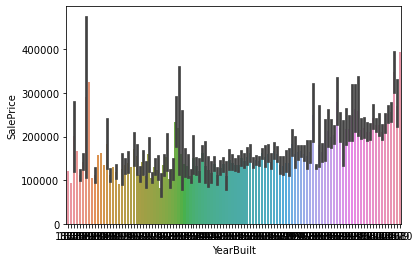

In [29]:
#연식대비 가격
sns.barplot(data = train, x = 'YearBuilt', y = 'SalePrice')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

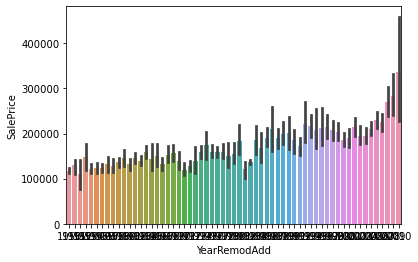

In [30]:
#리모델링 연식대비 가격
sns.barplot(data = train, x = 'YearRemodAdd', y = 'SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='TotalBsmtSF'>

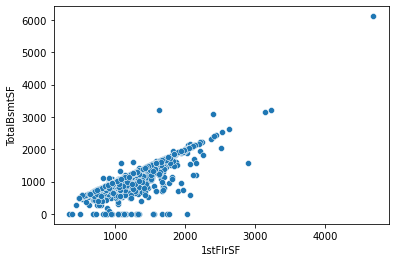

In [31]:
#지하 면적 대비 가격
sns.scatterplot(data = train, x = '1stFlrSF', y = 'TotalBsmtSF')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

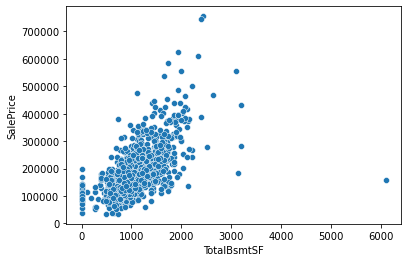

In [32]:
#지하 면적 대비 가격
sns.scatterplot(data = train, x = 'TotalBsmtSF', y = 'SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

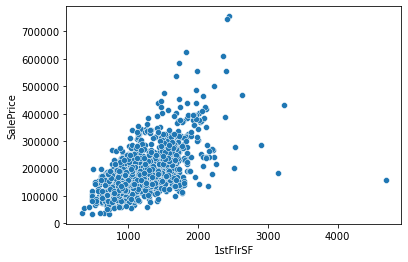

In [33]:
#1층 면적 대비 가격
sns.scatterplot(data = train, x = '1stFlrSF', y = 'SalePrice')

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

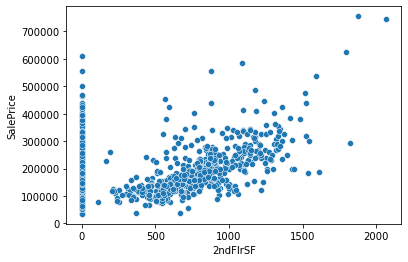

In [34]:
#2층 면적 대비 가격
sns.scatterplot(data = train, x = '2ndFlrSF', y = 'SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

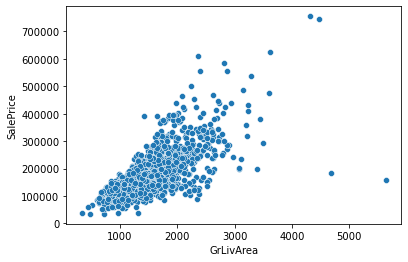

In [35]:
# 지상 면적 대비 가격
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

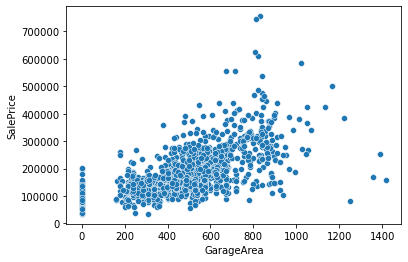

In [36]:
# 차고 면적 대비 가격
sns.scatterplot(data = train, x = 'GarageArea', y = 'SalePrice')

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

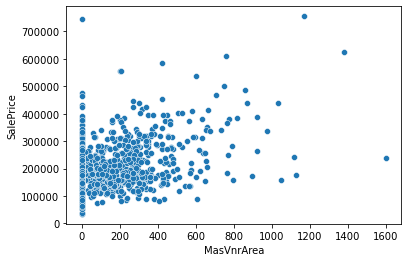

In [37]:
# 석조 베니어(?) 면적 대비 가격
sns.scatterplot(data = train, x = 'MasVnrArea', y = 'SalePrice')

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

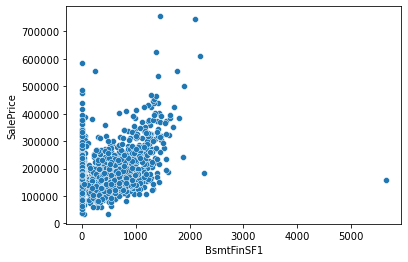

In [38]:
# 지하1층 면적 대비 가격
sns.scatterplot(data = train, x = 'BsmtFinSF1', y = 'SalePrice')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

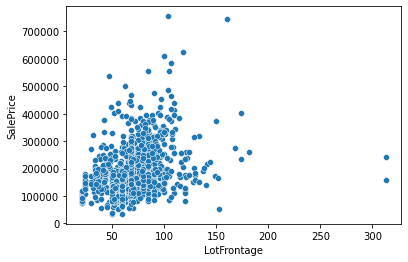

In [39]:
# 도로까지 거리??
sns.scatterplot(data = train, x = 'LotFrontage', y = 'SalePrice')

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

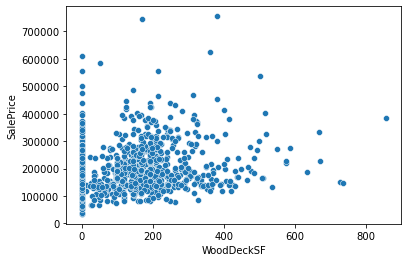

In [40]:
sns.scatterplot(data = train, x = 'WoodDeckSF', y = 'SalePrice')

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

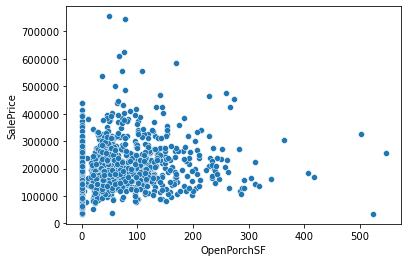

In [41]:
sns.scatterplot(data = train, x = 'OpenPorchSF', y = 'SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

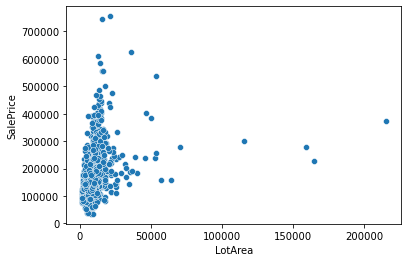

In [42]:
sns.scatterplot(data = train, x = 'LotArea', y = 'SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

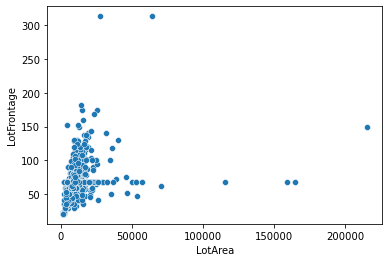

In [43]:
sns.scatterplot(data = train, x = 'LotArea', y = 'LotFrontage')

<AxesSubplot:xlabel='LotArea', ylabel='1stFlrSF'>

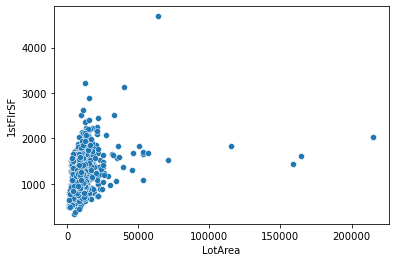

In [44]:
sns.scatterplot(data = train, x = 'LotArea', y = '1stFlrSF')

In [45]:
# outlier_delete
train = train.drop(train[train['TotalBsmtSF'] > 5000].index, axis = 0)
train = train.drop(train[train['1stFlrSF'] > 4000].index, axis = 0)
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index, axis = 0)
train = train.drop(train[(train['GarageArea'] > 12000) & (train['SalePrice'] < 300000)].index, axis = 0)
train = train.drop(train[(train['GarageArea'] > 12000) & (train['SalePrice'] < 300000)].index, axis = 0)
train = train.drop(train[(train['MasVnrArea'] == 0) & (train['SalePrice'] > 200000)].index, axis = 0)
train = train.drop(train[(train['MasVnrArea'] > 1000) & (train['SalePrice'] < 300000)].index, axis = 0)
train = train.drop(train[(train['BsmtFinSF1'] == 0) & (train['SalePrice'] > 500000)].index, axis = 0)
train = train.drop(train[(train['WoodDeckSF'] == 0) & (train['SalePrice'] > 600000)].index, axis = 0)
train = train.drop(train[(train['SalePrice'] > 700000)].index, axis = 0)
train = train.drop(train[(train['LotArea'] > 100000)].index, axis = 0)
train = train.drop(train[(train['LotArea'] > 100000) | (train['LotFrontage'] > 250)].index, axis = 0)
full_data = [train, test]

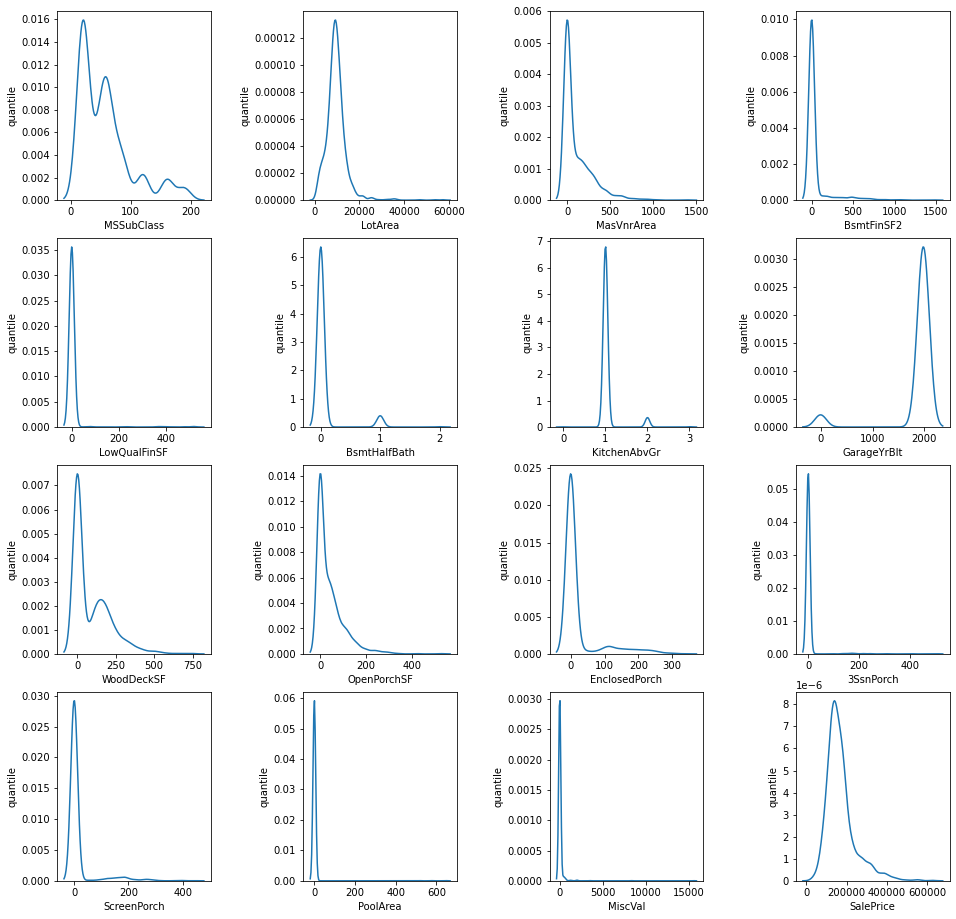

In [46]:
skew_columns = train.skew()[abs(train.skew()) > 1].index
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (16, 16))
for i, column in enumerate(skew_columns):
    sns.kdeplot(x = train[column], ax=ax[i//4][i%4])
    ax[i//4][i%4].set_ylabel('quantile')

plt.subplots_adjust(wspace=0.6)

In [47]:
for df in full_data:
    df['LotArea'] = np.log1p(df['LotArea'])
train['SalePrice'] = np.log1p(train['SalePrice'])

In [48]:
train_copy = train.copy()
test_copy = test.copy()

full_data = [train_copy, test_copy]
#feature engineer
for df in full_data:
    df['Rms_Gr_Mul'] = df['TotRmsAbvGrd'] * df['GrLivArea']
    df['1st_Bsmt_Sum'] = df['1stFlrSF'] + df['TotalBsmtSF']
    df['Car_Area_Mul'] = df['GarageCars'] * df['GarageArea']
    df['Bsmt_Qual_Mul'] = df['TotalBsmtSF'] * df['OverallQual']
    df['Has_Garage'] = df['GarageCars'].apply(lambda x : 1 if x > 0 else 0)
    df['Has_Bsmt'] = df['TotalBsmtSF'].apply(lambda x : 0 if x == 0 else 1)
    df['Is_Venner'] = df['MasVnrType'].apply(lambda x : 0 if x == 'None' else 1)
    df['Has_Fireplace'] = df['Fireplaces'].apply(lambda x : 0 if x == 0 else 1)
    df['Garage_Attched'] = df['GarageType'].apply(lambda x : 1 if x in ['Attchd', 'BuiltIn'] else 0)
    df['Total_Porch'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
#     df['Has_Wood'] = df['WoodDeckSF'].apply(lambda x : 0 if x == 0 else 1)
#     df['Has_Porch'] = df['OpenPorchSF'].apply(lambda x : 0 if x == 0 else 1)
    df['New_SaleType'] = df['SaleType'].apply(lambda x : 1 if x == 'New' else 0)
    
    df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x in ['Y', 'P'] else 0)
    df['ExterQual'] = df['ExterQual'].apply(lambda x : 1 if x in ['TA', 'Fa'] else 0)
    df['BsmtQual'] = df['BsmtQual'].apply(lambda x : 1 if x in ['TA', 'Fa', 'Na'] else 0)
    df['GarageFinish'] = df['GarageFinish'].apply(lambda x : 1 if x in ['Fin', 'RFn'] else 0)
    #     df['KitchenQual'] = df['KitchenQual'].apply(lambda x : 1 if x in ['TA', 'Fa'] else 0)
    
    
    
    df.drop(['Utilities', 'Exterior1st', 'PoolArea', 'PoolQC', 'BsmtHalfBath',
             'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis = 1, inplace = True)

In [49]:
train_copy.shape, test_copy.shape

((1293, 80), (1459, 80))

In [50]:
# drop_col = []
# col = train_copy.columns
# for i in range(1, len(train.columns)):
#     for j in range(0, i):
#         x, y = train_copy[col[i]], train_copy[col[j]]
#         if x.dtype == 'object' or y.dtype == 'object':
#             continue
#         if abs(np.corrcoef(x, y)[0][1]) >= 0.8:
#             drop_col.append(col[j])
#             break
            
# for df in [train_copy, test_copy]:
#     df.drop(drop_col, axis = 1, inplace = True)

In [51]:
train_copy.shape, test_copy.shape

((1293, 80), (1459, 80))

In [52]:
# before feature engineer : 0.1147
# after feature enginner : 1115
data = pd.get_dummies(pd.concat([train_copy, test_copy], axis = 0))

train_copy = data[:len(train)]
test_copy = data[len(train):]

target = train_copy['SalePrice']
test_id = test['Id']
train_copy.drop(['Id', 'SalePrice'], axis = 1, inplace = True)
test_copy.drop(['Id', 'SalePrice'], axis = 1, inplace = True)

In [53]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train_copy):
    rmse = np.sqrt(-cross_val_score(model, X, target, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [54]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [55]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [56]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[12:52:16] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:52] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:31] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:04] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:41] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:16] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:46] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objecti

In [57]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1550 (0.0271)


In [58]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1104 (0.0156)


In [59]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.1341 (0.0209)


In [60]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.1119 (0.0181)


In [61]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(train_copy), np.array(target))

stack_gen
[13:07:32] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:50] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:08] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:25] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:46] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be igno

In [62]:
print('lgb_model')
lgb_model = lightgbm.fit(np.array(train_copy), np.array(target))

lgb_model


In [63]:
feat_imp = pd.DataFrame({'feature': train_copy.columns, 'importance': lgb_model.feature_importances_}).sort_values('importance', ascending = False)

In [64]:
feat_imp[150:]

,feature,importance
98,Condition1_Feedr,8
232,GarageType_BuiltIn,6
177,BsmtExposure_Mn,6
125,HouseStyle_SFoyer,6
87,Neighborhood_NoRidge,5
172,BsmtCond_Na,4
171,BsmtCond_Gd,4
167,Foundation_Slab,4
184,BsmtFinType1_Na,3
40,Has_Bsmt,3


<AxesSubplot:xlabel='importance', ylabel='feature'>

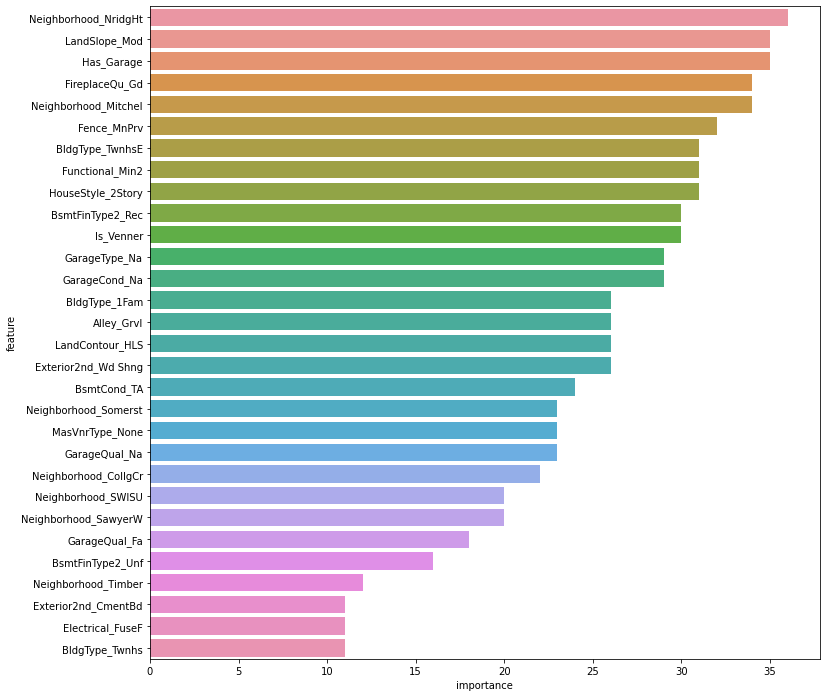

In [65]:
plt.figure(figsize = (12, 12))
sns.barplot(data = feat_imp[120:150], x = 'importance', y = 'feature')

In [66]:
print('xgboost')
xgboost_model = xgboost.fit(np.array(train_copy), np.array(target))

xgboost
[13:14:44] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [67]:
print('Svr')
svr_model = svr.fit(np.array(train_copy), np.array(target))

Svr


In [68]:
print('Ridge')
ridge_model = ridge.fit(np.array(train_copy), np.array(target))

Ridge


In [69]:
print('RandomForest')
rf_model = rf.fit(np.array(train_copy), np.array(target))

RandomForest


In [70]:
print('GradientBoosting')
gbr_model = gbr.fit(np.array(train_copy), np.array(target))

GradientBoosting


In [71]:
def blended_predictions(X):
    return ((0.1 * ridge_model.predict(X)) + \
           (0.2 * svr_model.predict(X)) + \
           (0.1 * gbr_model.predict(X)) + \
           (0.1 * xgboost_model.predict(X)) + \
           (0.1 * lgb_model.predict(X)) + \
           (0.05 * rf_model.predict(X)) + \
           (0.35 * stack_gen_model.predict(X)))

In [72]:
#0.07343752413114131
blended_score = rmsle(target, blended_predictions(train_copy))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.07337162877574709


In [73]:
pd.set_option('display.max_rows', 20)
train_copy.shape, test_copy.shape

((1293, 253), (1459, 253))

In [74]:
y_pred = np.floor(np.expm1(gbr_model.predict(test_copy)))

In [75]:
y_pred

array([122431., 161580., 185427., ..., 168043., 118178., 212665.])

In [76]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
submission.to_csv('boston_house_lgb4.csv', index = False)

In [77]:
sns.boxplot(data = train, x = 'Has_Garage', y = 'SalePrice')

ValueError: Could not interpret input 'Has_Garage'

In [ ]:
(train['YearRemodAdd'] - train['YearBuilt']).value_counts()

In [ ]:
sns.boxplot(data = train, x = 'LandContour', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x = 'LotShape', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x = 'Utilities', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x = 'LotConfig', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x = 'LandSlope', y = 'SalePrice')

In [ ]:
plt.figure(figsize = (12, 12))
sns.boxplot(data = train, x = 'Neighborhood', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'Condition1', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'Condition2', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'BldgType', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'HouseStyle', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'OverallQual', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'OverallCond', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'YearBuilt', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'YearRemodAdd', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#리모델링 여부 (별차이가 없음)
train.loc[:, 'Built_Remod_Dif'] = train['YearRemodAdd'] - train['YearBuilt']
train['Built_Remod_Dif'] = train['Built_Remod_Dif'].apply(lambda x : 1 if x != 0 else 0)
sns.boxplot(data = train, x = 'Built_Remod_Dif', y = 'SalePrice')
train.drop('Built_Remod_Dif', axis = 1, inplace = True)

In [ ]:
sns.boxplot(data = train, x = 'RoofStyle', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.boxplot(data = train, x = 'RoofMatl', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 집 외부 덮개
sns.boxplot(data = train, x = 'Exterior1st', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 집 외부 덮개 (자재가 2개 이상인 경우)
sns.boxplot(data = train, x = 'Exterior2nd', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

1층과 2층은 병합해도 될듯하다

In [ ]:
# 석조 베니어 타입
sns.boxplot(data = train, x = 'MasVnrType', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train['Is_Venner'] = train['MasVnrType'].apply(lambda x : 0 if x == 'None' else 1)
sns.boxplot(data = train, x = 'Is_Venner', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('Is_Venner', axis = 1)
plt.show()

In [ ]:
#외부 재료의 품질
sns.boxplot(data = train, x = 'ExterQual', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train['ExterQual_bin'] = train['ExterQual'].apply(lambda x : 1 if x in ['TA', 'Fa'] else 0)
sns.boxplot(data = train, x = 'ExterQual_bin', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('ExterQual_bin', axis = 1, inplace = True)
plt.show()

In [ ]:
#외부 재료의 현재상태
sns.boxplot(data = train, x = 'ExterCond', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 건물의 토대 타입
sns.boxplot(data = train, x = 'Foundation', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 지하의 높이 평가
sns.boxplot(data = train, x = 'BsmtQual', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train['BsmtQual_bin'] = train['BsmtQual'].apply(lambda x : 1 if x in ['TA', 'Fa', 'Na'] else 0)
sns.boxplot(data = train, x = 'BsmtQual_bin', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('BsmtQual_bin', axis = 1, inplace = True)
plt.show()

In [ ]:
# 지하의 상태 평가
sns.boxplot(data = train, x = 'BsmtCond', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train['BsmtCond_bin'] = train['BsmtCond'].apply(lambda x : 1 if x in ['TA', 'Fa', 'Na'] else 0)
sns.boxplot(data = train, x = 'BsmtCond_bin', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('BsmtCond_bin', axis = 1, inplace = True)
plt.show()

In [ ]:
# 정원 상태
sns.boxplot(data = train, x = 'BsmtExposure', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 지하 1층 상태
sns.boxplot(data = train, x = 'BsmtFinType1', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.scatterplot(data = train, x = 'BsmtFinSF1', y = 'SalePrice')

In [ ]:
# 지하 2층 상태
sns.boxplot(data = train, x = 'BsmtFinType2', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.scatterplot(data = train, x = 'BsmtFinSF2', y = 'SalePrice')

In [ ]:
sns.scatterplot(data = train, x = 'BsmtUnfSF', y = 'SalePrice')

In [ ]:
sns.scatterplot(data = train, x = 'TotalBsmtSF', y = 'SalePrice')

In [ ]:
train['Has_Bsmt'] = train['TotalBsmtSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x = 'Has_Bsmt', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('Has_Bsmt', axis = 1, inplace = True)
plt.show()

In [ ]:
# 히터 타입
sns.boxplot(data = train, x = 'Heating', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train['Heating_A'] = train['Heating'].apply(lambda x : 1 if x == 'GasA' else 0)
sns.boxplot(data = train, x = 'Heating_A', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('Heating_A', axis = 1, inplace = True)
plt.show()

In [ ]:
# 히터 퀄리티
sns.boxplot(data = train, x = 'HeatingQC', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 중앙 에어컨 컨디션
sns.boxplot(data = train, x = 'CentralAir', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# 전기 시스템
sns.boxplot(data = train, x = 'Electrical', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train['Has_2nd'] = train['2ndFlrSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x = 'Has_2nd', y = 'SalePrice')
train.drop('Has_2nd', axis = 1, inplace = True)

In [ ]:
train['Has_LowQual'] = train['LowQualFinSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x = 'Has_LowQual', y = 'SalePrice')
train.drop('Has_LowQual', axis = 1, inplace = True)

In [ ]:
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'BsmtFullBath', y = 'SalePrice')

In [ ]:
# FullBath 의 갯수
train['Has_FullBath'] = train['BsmtFullBath'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x= 'Has_FullBath', y = 'SalePrice')
train.drop('Has_FullBath', axis = 1, inplace = True)

In [ ]:
sns.boxplot(data = train, x= 'BsmtHalfBath', y = 'SalePrice')

In [ ]:
# 1등급 이상의 침실
sns.boxplot(data = train, x= 'BedroomAbvGr', y = 'SalePrice')

In [ ]:
# 부엌 갯수
sns.boxplot(data = train, x= 'KitchenAbvGr', y = 'SalePrice')

In [ ]:
# 부엌 퀄리티
sns.boxplot(data = train, x= 'KitchenQual', y = 'SalePrice')

In [ ]:
train['KitchenQual_Bin'] = train['KitchenQual'].apply(lambda x : 1 if x in ['TA', 'Fa'] else 0)
sns.boxplot(data = train, x= 'KitchenQual_Bin', y = 'SalePrice')
train.drop('KitchenQual_Bin', axis = 1, inplace = True)

In [ ]:
#방의 갯수
sns.boxplot(data = train, x= 'TotRmsAbvGrd', y = 'SalePrice')

In [ ]:
#집의 기능
sns.boxplot(data = train, x= 'Functional', y = 'SalePrice')

In [ ]:
#벽난로 갯수
sns.boxplot(data = train, x= 'Fireplaces', y = 'SalePrice')

In [ ]:
train['Has_Fireplace'] = train['Fireplaces'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x= 'Has_Fireplace', y = 'SalePrice')
train.drop('Has_Fireplace', axis = 1, inplace = True)

In [ ]:
sns.boxplot(data = train, x= 'FireplaceQu', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'GarageType', y = 'SalePrice')

In [ ]:
train['Garage_Attched'] = train['GarageType'].apply(lambda x : 1 if x in ['Attchd', 'BuiltIn'] else 0)
sns.boxplot(data = train, x= 'Garage_Attched', y = 'SalePrice')
train.drop('Garage_Attched', axis = 1, inplace = True)

In [ ]:
sns.boxplot(data = train, x= 'GarageYrBlt', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'GarageFinish', y = 'SalePrice')

In [ ]:
train['GarageFinish_Bin'] = train['GarageFinish'].apply(lambda x : 1 if x in ['Fin', 'RFn'] else 0)
sns.boxplot(data = train, x= 'GarageFinish_Bin', y = 'SalePrice')
train.drop('GarageFinish_Bin', axis = 1, inplace = True)

In [ ]:
sns.boxplot(data = train, x= 'GarageCars', y = 'SalePrice')

In [ ]:
sns.scatterplot(data = train, x= 'GarageArea', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'GarageQual', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'GarageCond', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'PavedDrive', y = 'SalePrice')

In [ ]:
train['Pave_Done'] = train['PavedDrive'].apply(lambda x : 1 if x in ['Y', 'P'] else 0)
sns.boxplot(data = train, x= 'Pave_Done', y = 'SalePrice')
train.drop('Pave_Done', axis = 1, inplace = True)

In [ ]:
sns.scatterplot(data = train, x = 'WoodDeckSF', y = 'SalePrice')

In [ ]:
train['Has_Wood'] = train['WoodDeckSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x= 'Has_Wood', y = 'SalePrice')
train.drop('Has_Wood', axis = 1, inplace = True)

In [ ]:
sns.scatterplot(data = train, x = 'OpenPorchSF', y = 'SalePrice')

In [ ]:
train['Has_Porch'] = train['OpenPorchSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x= 'Has_Porch', y = 'SalePrice')
train.drop('Has_Porch', axis = 1, inplace = True)

In [ ]:
sns.scatterplot(data = train, x = 'EnclosedPorch', y = 'SalePrice')

In [ ]:
sns.scatterplot(data = train, x = '3SsnPorch', y = 'SalePrice')

In [ ]:
sns.scatterplot(data = train, x = 'ScreenPorch', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'PoolArea', y = 'SalePrice')

In [ ]:
sns.scatterplot(data = train, x = 'PoolArea', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'Fence', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'MiscFeature', y = 'SalePrice')

In [ ]:
plt.scatter(data = train, x = 'MiscVal', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'MoSold', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'YrSold', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'SaleType', y = 'SalePrice')

In [ ]:
sns.boxplot(data = train, x= 'SaleCondition', y = 'SalePrice')

In [ ]:
train['New_SaleType'] = train['SaleType'].apply(lambda x : 1 if x == 'New' else 0)
sns.boxplot(data = train, x= 'New_SaleType', y = 'SalePrice')
train.drop('New_SaleType', axis = 1, inplace = True)

In [ ]:
train['SaleCondition'].value_counts()